In [1]:
## Project Dependencies 
# Anacodna with tensorflow
# pandas 
# praw for scraping reddit posts
# beautifulsup4 for supportgroup
# another web scrping tool is call selenium

import bs4
import pandas as pd
from RedditClientInfo import Login

In [2]:
reddit_client = Login.LoginReddit()
depression_posts = reddit_client.subreddit('Depression').hot(limit=3000)
happy_posts = reddit_client.subreddit('Happy').hot(limit=1000)
suicide_posts = reddit_client.subreddit('SuicideWatch').hot(limit=1000)
anxiety_posts = reddit_client.subreddit('Anxiety').hot(limit=1000)
list_of_subreddit_posts = [happy_posts, suicide_posts, depression_posts, anxiety_posts]

In [3]:
## post.is_self == True mean that is a text base post
happy_text = []
depression_text = []
anxiety_text  = []
suicide_text = []
happy_label  = []
depression_label = []
anxiety_label = []
suicide_label = []
for post in happy_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        happy_text.append(current_post)
        happy_label.append("happy")
for post in suicide_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        suicide_text.append(current_post)
        suicide_label.append("suicidal")
for post in depression_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        depression_text.append(current_post)
        depression_label.append("depression")
for post in anxiety_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        anxiety_text.append(current_post)
        anxiety_label.append("anxiety")

 


In [4]:
happy_text = happy_text[2:]
happy_label = happy_label[2:]

suicide_text = suicide_text[2:]
suicide_label = suicide_label[2:]

depression_text = depression_text[2:]
depression_label = depression_label[2:]

anxiety_text = anxiety_text[2:]
anxiety_label =  anxiety_label[2:]

In [5]:
all_text = happy_text + suicide_text + depression_text + anxiety_text
labels = happy_label + suicide_label + depression_label + anxiety_label

In [6]:
all_posts ={"text": all_text, "label": labels  }

In [7]:
from pandas import DataFrame
df = DataFrame(all_posts,columns= ['text', 'label'])
df.head()

,text,label
0,For the first time in 5 years I’m wearing larg...,happy
1,I came out as trans to my internet friends rec...,happy
2,It‘s my birthday and I feel incredibly loved\n...,happy
3,A stranger did something very kind for me and ...,happy
4,How do you stay happy? I feel like a lot of go...,happy


In [8]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)
sentiment_category= ["postive", "anxiety", "depression", "suicide"]

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [10]:
happy_data_set =  df[df["label"]== "happy"]
anxiety_data_set = df[df["label"]== "anxiety"]
depression_data_set =df[df["label"]== "depression"]
suicide_data_set =df[df["label"]== "suicidal"]
print(suicide_data_set.head())

                                                  text     label
208  After 20 years of life no one knows me well en...  suicidal
209  You ever start having suicidal thoughts when y...  suicidal
210  my mom saw my new cuts\n\ngusse fuckin what? s...  suicidal
211  I just want to say I love you all\n\nEven if y...  suicidal
212  I love you\n\nI've never been to a psychologis...  suicidal


For the first time in 5 years I’m wearing large instead of XXL I’m so happy

I’ve been through hell for years dealing with depression and really awful thoughts and this month was the worst but today I tried wearing a XXL shirt it was too big for me then I went for the XL it was still big but when I tried wearing the large shirt it was perfect I never had a smile this big in years. I know it’s a small thing but I’m so happy that I can fit in large clothes. 
Thanks for reading have a wonderful life :)


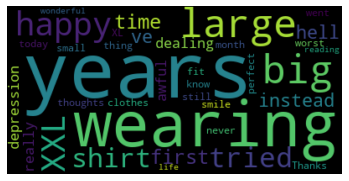

In [11]:
text = happy_data_set['text'][0]
print(text)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

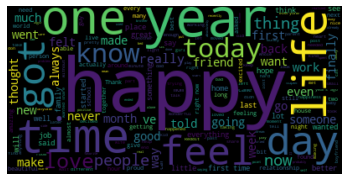

In [12]:
all_words = ''
for happy_text in happy_data_set['text']:
    all_words += happy_text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()    

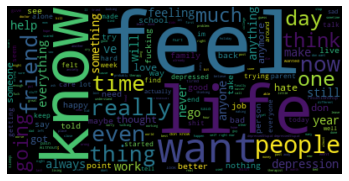

In [13]:
all_words = ''
for text in depression_data_set['text']:
    all_words += text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()    

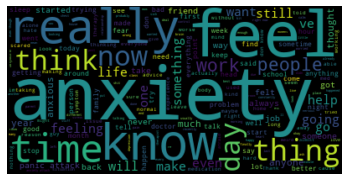

In [14]:
all_words = ''
for text in anxiety_data_set['text']:
    all_words += text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()   

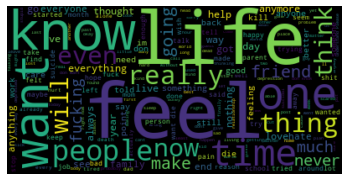

In [15]:
all_words = ''
for text in suicide_data_set['text']:
    all_words += text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()  

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re

c:\users\nie209\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nie209\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nie209\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\nie209\anaconda3\envs\tensorflow_c

In [17]:
print(df[ df['label'] == 'happy'].size)
print(df[ df['label'] == 'depression'].size)
# for idx,row in df.iterrows():
#     row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
print(X)

416
1884
[[   0    0    0 ...    6 1215   44]
 [   0    0    0 ...    2  731   31]
 [   0    0    0 ...   33   18   76]
 ...
 [   0    0    0 ...    4  146   49]
 [   0    0    0 ...   15  429   28]
 [   0    0    0 ...  999   54   62]]


In [18]:
embed_dim = 128
lstm_out = 196

model = keras.Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))

model.add(LSTM(lstm_out))
model.add(Dense(4,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3145, 128)         256000    
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 4)                 788       
Total params: 511,588
Trainable params: 511,588
Non-trainable params: 0
_________________________________________________________________
None


In [19]:


Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)



(2096, 3145) (2096, 4)
(1033, 3145) (1033, 4)


In [ ]:


batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)



c:\users\nie209\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/7
